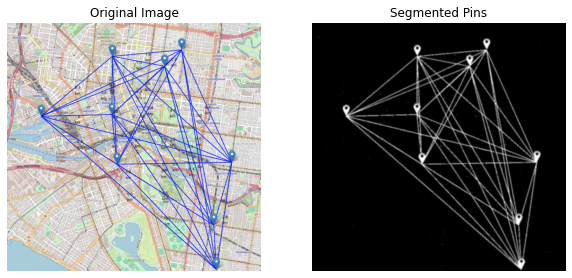

In [50]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'map.png'
image = cv2.imread(image_path)

# Define the segment_fish function
def segment_pins(image):
    ''' Attempts to segment the pins out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Set the range for blue pins
    light_blue = (100, 150, 0)
    dark_blue = (140, 255, 255)

    # Apply the blue mask 
    mask = cv2.inRange(hsv_image, light_blue, dark_blue)

    # Clean up the segmentation using a blur
    blur = cv2.GaussianBlur(mask, (7, 7), 0)
    return blur

# Apply the segmentation function to the image
segmented = segment_pins(image)

# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Pins')
plt.axis('off')

plt.show()


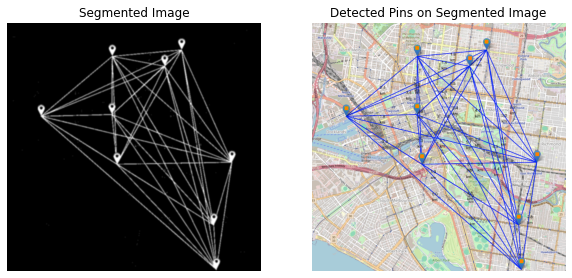

array([[306,  72],
       [306, 242],
       [508,  54],
       [602, 564],
       [460, 102],
       [656, 382],
       [100, 248],
       [320, 388],
       [610, 694]])

In [62]:
circles_segmented = cv2.HoughCircles(segmented, cv2.HOUGH_GRADIENT, dp=0.1, minDist=20, param1=50, param2=12, minRadius=1, maxRadius=5)

# Convert the (x, y) coordinates and radius of the circles to integers
output_segmented = image.copy()
if circles_segmented is not None:
    circles_segmented = np.round(circles_segmented[0, :]).astype("int")
    for (x, y, r) in circles_segmented:
        cv2.circle(output_segmented, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output_segmented, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# Display the result on segmented image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_segmented, cv2.COLOR_BGR2RGB))
plt.title('Detected Pins on Segmented Image')
plt.axis('off')

plt.show()

# Return coordinates of detected circles on segmented image
if circles_segmented is not None:
    pin_coordinates_segmented = circles_segmented[:, :2]
    pin_coordinates_segmented
else:
    pin_coordinates_segmented = "No pins detected on segmented image"
pin_coordinates_segmented

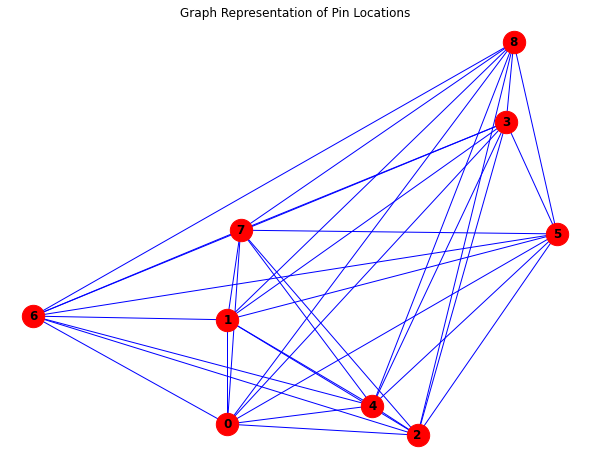

In [65]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes with positions from the coordinates
for i, coord in enumerate(pin_coordinates_segmented):
    G.add_node(i, pos=(coord[0], coord[1]))

# Add edges between all nodes to create a fully connected graph
for i in range(len(pin_coordinates_segmented)):
    for j in range(i + 1, len(pin_coordinates_segmented)):
        G.add_edge(i, j)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color='red', node_size=500, with_labels=True, font_weight='bold', edge_color='blue')
plt.title('Graph Representation of Pin Locations')
plt.show()
